# Project 1 - Aurèle Bohbot, Quentin Guilhot, Yanis Tournier

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.metrics import r2_score
from collections import Counter

In [90]:
X = pd.read_csv('X_train.csv').drop(columns=['id'])
Xt = pd.read_csv('X_test.csv')
y = pd.read_csv('y_train.csv')
to_drop = ['x104', 'x129', 'x489', 'x530']
X = X.drop(columns=to_drop)
y = y.drop(columns=['id'])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling outliers

In [32]:
avg=X_train.mean()
var=X_train.var()
cov=X_train.cov()

In [118]:
0.997**(800/50)

0.9530650263643888

In [ ]:
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1, Q3 = np.percentile(df[c],25), np.percentile(df[c],75)
        
        #IQR calculation
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q3 + (outlier_step)
        
        #Outlier detection                                    #Outlier indexes
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        #Store indexes
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    # number of outliers
    # If we have more then 2 outliers in a sample, this sample ll be drop
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2 )
    #we are taking indexes
    
    return multiple_outliers

### Handling missing values 

For the moment, we replace the missing values by the column's median. Depending on the results, we might implement a knn algorithm.

In [92]:
X_filled = X_train.fillna(X_train.median())

In [93]:
X_norm = X_filled.copy()
for col in X_filled.columns:
    X_norm[col] = (X_filled[col] - X_filled[col].mean()) / X_filled[col].var()
X_norm

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
806,0.000401,0.001566,0.000971,-1.898010e-04,-0.473492,-0.000480,-0.000385,-0.001698,0.000037,-0.072864,...,0.000144,0.000465,-0.000631,0.195912,0.002024,0.002457,-1.034119,0.004054,0.051652,0.001229
591,-0.000506,0.000010,-0.002455,-6.222288e-05,0.243028,-0.121647,0.000271,-0.002193,-0.005757,-0.609136,...,-0.001448,-0.000333,-0.004205,-0.312476,0.061154,0.000112,0.727801,-0.000689,0.030222,0.001004
361,-0.000017,0.000093,0.002247,-3.355576e-08,-0.006433,0.069583,0.000017,-0.006196,-0.005941,-1.007904,...,-0.000173,0.000086,-0.000989,-0.089989,0.235401,-0.001400,-2.217684,-0.005465,-0.058736,0.000620
266,-0.000227,-0.000022,-0.000640,-1.917863e-04,0.002499,-0.319502,0.000269,-0.005150,-0.006275,-0.917006,...,0.000226,0.000460,0.002538,-0.251294,0.086133,-0.001476,4.535187,-0.001200,0.003431,-0.000651
879,-0.000103,-0.000722,0.001123,7.499469e-05,-0.346855,0.225285,-0.001076,0.006932,0.004788,-0.399058,...,-0.000804,-0.000209,0.003437,-0.384839,-0.163415,-0.004382,-6.492582,0.003093,0.054740,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-0.000021,0.000185,-0.000699,-1.442587e-04,-0.306512,-0.074619,0.001326,0.000268,0.001991,-0.036737,...,0.000127,0.000096,-0.000631,0.605737,-0.246015,0.001750,-0.520480,0.000031,0.010332,0.001710
1095,-0.000132,-0.000567,-0.001448,4.730944e-05,-0.298873,-0.045282,-0.002531,0.004641,-0.004720,-0.540256,...,0.000935,0.000117,-0.001329,-0.557548,0.015850,0.001357,5.579982,-0.005231,-0.048276,-0.000989
1130,-0.000309,-0.000030,-0.001530,-3.355576e-08,0.501975,0.017081,-0.000698,-0.000002,0.005510,0.613534,...,-0.000159,0.000536,-0.000631,-0.217634,0.422561,0.000151,1.636514,0.002245,0.042246,0.000203
860,0.000496,0.000957,0.003818,3.365401e-05,0.598835,-0.024605,0.001083,-0.000512,-0.001144,-0.853322,...,-0.002345,0.000550,0.007706,-0.231944,0.589076,0.003152,1.524929,0.003915,-0.008156,-0.002422


In [94]:
d = {}
for col in X_norm.columns:
    Q1, Q3 = np.percentile(X_norm[col],25), np.percentile(X_norm[col],75)
    IQR = Q3 - Q1
    outlier_step = IQR * 2
    lower_range = Q1 - (outlier_step)
    upper_range = Q3 + (outlier_step)
    d[col] = (lower_range, upper_range)
for i, row in X_norm.iterrows():
    for col in X_norm.columns:
        if row[col] < d[col][0] or row[col] > d[col][1]:
            X_norm.loc[i,col]=0
X_norm

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
806,0.000401,0.001566,0.000971,-1.898010e-04,-0.473492,-0.000480,-0.000385,-0.001698,0.000037,-0.072864,...,0.000144,0.000465,-0.000631,0.195912,0.002024,0.002457,-1.034119,0.004054,0.051652,0.001229
591,-0.000506,0.000010,-0.002455,-6.222288e-05,0.243028,-0.121647,0.000271,-0.002193,-0.005757,-0.609136,...,-0.001448,-0.000333,-0.004205,-0.312476,0.061154,0.000112,0.727801,-0.000689,0.030222,0.001004
361,-0.000017,0.000093,0.002247,-3.355576e-08,-0.006433,0.069583,0.000017,-0.006196,-0.005941,-1.007904,...,-0.000173,0.000086,-0.000989,-0.089989,0.235401,-0.001400,-2.217684,-0.005465,-0.058736,0.000620
266,-0.000227,-0.000022,-0.000640,-1.917863e-04,0.002499,-0.319502,0.000269,-0.005150,-0.006275,-0.917006,...,0.000226,0.000460,0.002538,-0.251294,0.086133,-0.001476,4.535187,-0.001200,0.003431,-0.000651
879,-0.000103,-0.000722,0.001123,7.499469e-05,-0.346855,0.225285,-0.001076,0.006932,0.004788,-0.399058,...,-0.000804,-0.000209,0.003437,-0.384839,-0.163415,-0.004382,-6.492582,0.003093,0.054740,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,-0.000021,0.000185,-0.000699,-1.442587e-04,-0.306512,-0.074619,0.001326,0.000268,0.001991,-0.036737,...,0.000127,0.000096,-0.000631,0.605737,-0.246015,0.001750,-0.520480,0.000031,0.010332,0.001710
1095,-0.000132,-0.000567,-0.001448,4.730944e-05,-0.298873,-0.045282,-0.002531,0.004641,-0.004720,-0.540256,...,0.000935,0.000117,-0.001329,-0.557548,0.015850,0.001357,5.579982,-0.005231,-0.048276,-0.000989
1130,-0.000309,-0.000030,-0.001530,-3.355576e-08,0.501975,0.017081,-0.000698,-0.000002,0.005510,0.613534,...,-0.000159,0.000536,-0.000631,-0.217634,0.422561,0.000151,1.636514,0.002245,0.042246,0.000203
860,0.000496,0.000957,0.003818,3.365401e-05,0.598835,-0.024605,0.001083,-0.000512,-0.001144,-0.853322,...,-0.002345,0.000550,0.007706,-0.231944,0.589076,0.003152,1.524929,0.003915,-0.008156,-0.002422


### Handling feature selections

In [89]:
print(y_train)

          id     y
806    806.0  63.0
591    591.0  80.0
361    361.0  54.0
266    266.0  73.0
879    879.0  55.0
...      ...   ...
1044  1044.0  86.0
1095  1095.0  79.0
1130  1130.0  74.0
860    860.0  63.0
1126  1126.0  77.0

[969 rows x 2 columns]


In [79]:
lasso = Lasso()
lasso.fit(X_norm, y_train)

Lasso()

In [88]:
lasso.coef_[1]

array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.00887399,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.00757851, -0.01098024, -0.  

In [86]:
print(lasso.coef_)
len([coef for coef in lasso.coef_ if coef!=0])

[[ 0.  0.  0. ...  0. -0. -0.]
 [ 0.  0. -0. ...  0.  0.  0.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

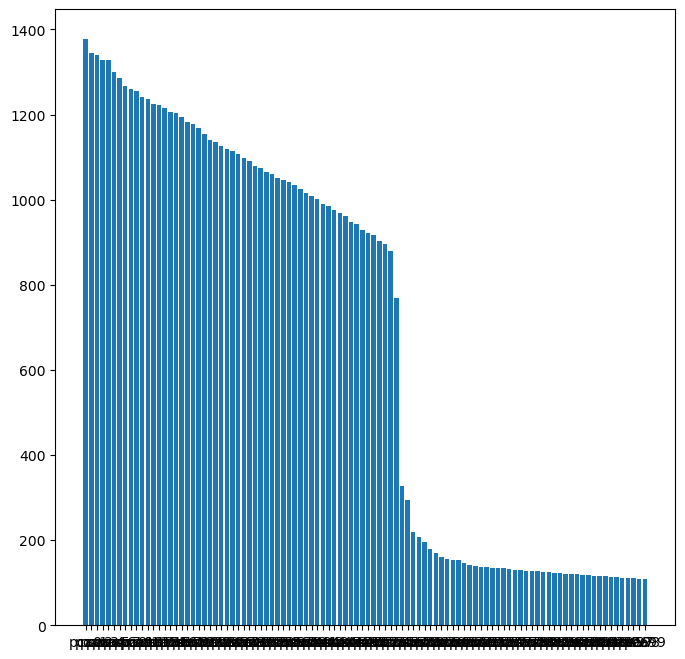

In [101]:
pca=PCA(n_components=100)
pca.fit(X_norm, y_train)

plt.figure(figsize=(8,8))
plt.bar(pca.get_feature_names_out(),pca.singular_values_)
plt.show()

In [102]:
X_pca = pca.transform(X_norm)
model = LinearRegression()
model.fit(X_pca, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(pca.transform(X_test))
score = r2_score(y_test, y_pred)
score

-31171062.445235606

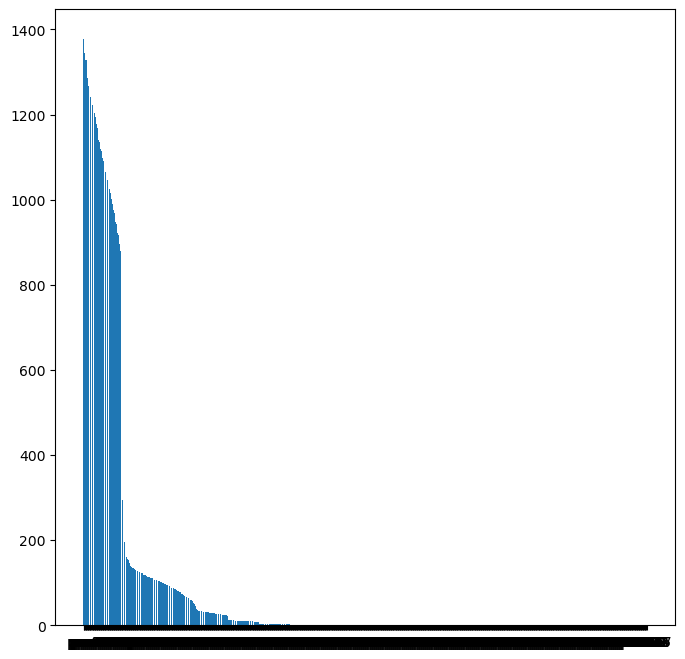

In [28]:
plt.figure(figsize=(8,8))
plt.bar(pca.get_feature_names_out(),pca.singular_values_)
plt.show()